In [1]:
import types 
import pandas as pd 
from botocore.client import Config 
import ibm_boto3 

def __iter__(self): return 0 

## Credentials removed manually

df_data_1 = pd.read_csv(body) 

print("HPD DF loaded and ready to rock")

HPD DF loaded and ready to rock


In [2]:
## Credentials removed manually

df_data_2 = pd.read_csv(body) 

print("PLUTO loaded and ready to go")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (16,17,18,20,22,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


PLUTO loaded and ready to go


In [3]:
df_data_2.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,BX,5641.0,670.0,210.0,516.0,2.0,NaN,13.0,NaN,NaN,...,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,QN,3935.0,3.0,407.0,929.0,1001.0,25.0,19.0,11356.0,E297,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,BX,4205.0,41.0,211.0,296.0,2000.0,11.0,13.0,NaN,Q061,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,BX,2402.0,14.0,201.0,69.0,2005.0,7.0,17.0,NaN,L055,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,SI,63.0,83.0,501.0,81.0,2006.0,31.0,49.0,10301.0,E155,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


In [4]:
## Getting PLUTO data for buildings
df_data_2 = df_data_2.loc[(df_data_2["borough"] == ("BX"))]  
bronx_pluto = df_data_2[["bldgarea", "bldgdepth", "builtfar", "commfar", "facilfar", "lot", "lotarea", "lotdepth", "numbldgs",
                           "numfloors", "resarea", "residfar", "retailarea", "yearbuilt", "address"]]
bronx_pluto.head()

,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,retailarea,yearbuilt,address
0,0.0,0.0,0.00,0.0,0.0,670.0,53758.0,219.00,0.0,0.0,NaN,0.00,NaN,0.0,CITY ISLAND AVENUE
2,0.0,0.0,0.00,0.0,2.0,41.0,2369.0,95.06,0.0,0.0,NaN,0.90,NaN,0.0,SEMINOLE AVENUE
3,0.0,0.0,0.00,0.0,4.8,14.0,3750.0,100.00,0.0,0.0,NaN,2.43,NaN,0.0,EAST 156 STREET
6,3738.0,59.0,0.49,0.0,2.0,1502.0,7619.0,101.58,1.0,3.0,3738.0,0.90,0.0,2005.0,5102 POST ROAD
21,1598.0,39.0,0.64,0.0,2.0,7.0,2500.0,100.00,2.0,2.0,1598.0,0.90,0.0,1920.0,988 PIERCE AVENUE


In [5]:
HPD_df = df_data_1

In [6]:
HPD_df = HPD_df.loc[(HPD_df["borough"] == ("BRONX"))]
HPD_df = HPD_df[["complaint_type", "incident_address"]]
HPD_df.head()

,complaint_type,incident_address
10,PAINT/PLASTER,1230 TELLER AVENUE
11,PAINT/PLASTER,1230 TELLER AVENUE
12,UNSANITARY CONDITION,1230 TELLER AVENUE
13,UNSANITARY CONDITION,1230 TELLER AVENUE
14,PAINT/PLASTER,1230 TELLER AVENUE


In [7]:
### We can merge both datasets by the address

HPD_df = HPD_df.rename(columns={"incident_address" : "address"})
HPD_df.head()

,complaint_type,address
10,PAINT/PLASTER,1230 TELLER AVENUE
11,PAINT/PLASTER,1230 TELLER AVENUE
12,UNSANITARY CONDITION,1230 TELLER AVENUE
13,UNSANITARY CONDITION,1230 TELLER AVENUE
14,PAINT/PLASTER,1230 TELLER AVENUE


In [8]:
merged_df = pd.merge(HPD_df, bronx_pluto, how="outer", on="address")
merged_df.head()

,complaint_type,address,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,retailarea,yearbuilt
0,PAINT/PLASTER,1230 TELLER AVENUE,73724.0,83.0,5.9,0.0,4.8,1.0,12500.0,100.0,1.0,8.0,73724.0,3.44,0.0,1941.0
1,PAINT/PLASTER,1230 TELLER AVENUE,73724.0,83.0,5.9,0.0,4.8,1.0,12500.0,100.0,1.0,8.0,73724.0,3.44,0.0,1941.0
2,UNSANITARY CONDITION,1230 TELLER AVENUE,73724.0,83.0,5.9,0.0,4.8,1.0,12500.0,100.0,1.0,8.0,73724.0,3.44,0.0,1941.0
3,UNSANITARY CONDITION,1230 TELLER AVENUE,73724.0,83.0,5.9,0.0,4.8,1.0,12500.0,100.0,1.0,8.0,73724.0,3.44,0.0,1941.0
4,PAINT/PLASTER,1230 TELLER AVENUE,73724.0,83.0,5.9,0.0,4.8,1.0,12500.0,100.0,1.0,8.0,73724.0,3.44,0.0,1941.0


In [9]:
print(merged_df.dtypes)

complaint_type     object
address            object
bldgarea          float64
bldgdepth         float64
builtfar          float64
commfar           float64
facilfar          float64
lot               float64
lotarea           float64
lotdepth          float64
numbldgs          float64
numfloors         float64
resarea           float64
residfar          float64
retailarea        float64
yearbuilt         float64
dtype: object


In [10]:
## We can see by grouping by means, that the building with HHW&H complaints tend to be slightly bigger than those with different ones
merged_df = merged_df.dropna(how = "any", axis = 0)

df_group_one = merged_df.groupby(['complaint_type'],as_index=False).mean()
df_group_one

,complaint_type,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,retailarea,yearbuilt
0,AGENCY,28127.666667,77.333333,3.593333,0.000000,4.800000,41.333333,7291.666667,104.473333,1.333333,5.000000,27377.666667,3.440000,750.000000,1915.000000
1,APPLIANCE,48032.086870,86.397914,3.827474,0.104529,4.636266,100.091956,12762.569231,111.388007,1.109330,5.205857,46346.419050,3.344493,789.223542,1932.297229
2,CONSTRUCTION,47546.778656,84.254308,3.549960,0.096574,4.458366,84.168643,12394.280632,110.331318,1.089592,5.186430,46444.080369,3.068854,653.888011,1929.495389
3,DOOR/WINDOW,49719.279191,87.494112,3.910754,0.106224,4.686141,97.395378,13296.550980,111.143441,1.099184,5.312571,48153.714209,3.383149,705.035590,1931.438205
4,ELECTRIC,42268.705436,83.677712,3.459939,0.103869,4.505372,91.779512,11177.238576,109.831405,1.104864,4.885878,40983.647457,3.193766,685.120275,1931.203102
5,ELEVATOR,84850.210607,91.350676,5.453620,0.047041,4.926902,184.326672,19655.330515,119.227763,1.102229,7.030746,79891.513451,3.680600,1243.689470,1941.839354
6,FLOORING/STAIRS,49885.052463,90.099442,3.947009,0.104752,4.781775,87.817623,12636.209102,111.428100,1.088297,5.243499,48663.774269,3.513165,774.597885,1928.352229
7,GENERAL,51889.555409,89.093133,4.000756,0.108590,4.705896,111.591312,13733.988878,113.520915,1.102637,5.359714,49880.912982,3.428861,756.019473,1932.840027
8,GENERAL CONSTRUCTION,46068.643092,87.688984,3.571544,0.103399,4.654726,79.285954,12374.091246,111.199446,1.107296,5.106621,44828.721641,3.376902,695.760392,1929.148110
9,General,52488.347032,81.218311,3.500000,0.104110,4.521918,91.780822,11930.319635,109.428995,1.091324,5.469178,50340.232877,3.125114,892.036530,1935.182648


In [11]:
## Let's get the number of incidents bt complaint type

df_values = merged_df["complaint_type"].value_counts()
df_values = df_values.reset_index()
df_values = df_values.rename(columns={"complaint_type" : "incidents"})
df_values = df_values.rename(columns={"index" : "complaint_type"})
df_values

,complaint_type,incidents
0,HEAT/HOT WATER,282687
1,HEATING,170062
2,PLUMBING,143522
3,UNSANITARY CONDITION,98183
4,GENERAL CONSTRUCTION,95456
5,PAINT/PLASTER,85666
6,PAINT - PLASTER,69860
7,ELECTRIC,59763
8,DOOR/WINDOW,48637
9,NONCONST,45154


In [12]:
merged_values = pd.merge(df_values, df_group_one, how="outer", on="complaint_type")

In [13]:
merged_values

,complaint_type,incidents,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,retailarea,yearbuilt
0,HEAT/HOT WATER,282687,55468.057106,91.428547,4.212634,0.086972,4.661485,105.810557,15221.594290,117.291761,1.110907,5.508973,53547.746946,3.391212,808.576266,1933.019697
1,HEATING,170062,54019.732368,91.609934,3.743762,0.075010,4.625866,85.862756,14970.931390,118.162306,1.111506,5.405437,52290.209430,3.371628,739.856646,1931.599817
2,PLUMBING,143522,49798.006152,88.405593,3.787334,0.102568,4.667021,101.417838,13065.337272,112.465586,1.104757,5.277853,48256.576790,3.391334,788.814732,1931.313527
3,UNSANITARY CONDITION,98183,51461.714207,87.024539,3.970867,0.102115,4.645920,103.924193,13651.571586,112.208609,1.112922,5.318396,49768.185409,3.345113,787.782732,1932.678081
4,GENERAL CONSTRUCTION,95456,46068.643092,87.688984,3.571544,0.103399,4.654726,79.285954,12374.091246,111.199446,1.107296,5.106621,44828.721641,3.376902,695.760392,1929.148110
5,PAINT/PLASTER,85666,51659.363598,90.064796,4.808902,0.102136,4.736122,96.058833,13327.199601,112.010490,1.096316,5.339998,50090.859267,3.472116,871.944225,1930.242862
6,PAINT - PLASTER,69860,48006.060177,90.125500,3.823746,0.109525,4.703129,82.493959,12598.068208,111.786129,1.102648,5.155770,46695.982393,3.443191,771.389364,1928.943931
7,ELECTRIC,59763,42268.705436,83.677712,3.459939,0.103869,4.505372,91.779512,11177.238576,109.831405,1.104864,4.885878,40983.647457,3.193766,685.120275,1931.203102
8,DOOR/WINDOW,48637,49719.279191,87.494112,3.910754,0.106224,4.686141,97.395378,13296.550980,111.143441,1.099184,5.312571,48153.714209,3.383149,705.035590,1931.438205
9,NONCONST,45154,44889.190969,86.390447,3.492374,0.121604,4.580204,85.274106,12185.682309,111.473296,1.103977,5.035852,43239.358816,3.258805,702.082495,1930.022102


In [14]:
#Any correlations?

merged_values.corr()

,incidents,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,resarea,residfar,retailarea,yearbuilt
incidents,1.000000,0.223388,0.491680,-0.021267,0.303123,0.033283,-0.072548,0.382065,0.392183,-0.262118,-0.086526,0.236340,0.013761,0.105768,-0.139561
bldgarea,0.223388,1.000000,0.801335,0.515607,0.375178,0.428380,-0.048629,0.923537,0.769420,-0.556585,0.328747,0.999336,0.313090,0.715888,0.126736
bldgdepth,0.491680,0.801335,1.000000,0.337506,0.688086,0.412528,-0.207611,0.867898,0.746573,-0.713563,0.111204,0.814561,0.270801,0.633011,-0.115167
builtfar,-0.021267,0.515607,0.337506,1.000000,-0.173968,0.849433,-0.395823,0.244659,0.756039,0.253827,0.856815,0.511701,0.847875,0.112634,0.744197
commfar,0.303123,0.375178,0.688086,-0.173968,1.000000,-0.036820,-0.026809,0.554961,0.254317,-0.763717,-0.317698,0.391220,-0.156403,0.416024,-0.366785
facilfar,0.033283,0.428380,0.412528,0.849433,-0.036820,1.000000,-0.663428,0.149903,0.763605,0.212401,0.902588,0.433526,0.978074,-0.035124,0.740821
lot,-0.072548,-0.048629,-0.207611,-0.395823,-0.026809,-0.663428,1.000000,0.117965,-0.300760,-0.073573,-0.521136,-0.071698,-0.616985,0.058970,-0.380225
lotarea,0.382065,0.923537,0.867898,0.244659,0.554961,0.149903,0.117965,1.000000,0.638147,-0.769606,-0.016686,0.925758,0.013598,0.802028,-0.206283
lotdepth,0.392183,0.769420,0.746573,0.756039,0.254317,0.763605,-0.300760,0.638147,1.000000,-0.160638,0.653260,0.770955,0.706462,0.297370,0.497104
numbldgs,-0.262118,-0.556585,-0.713563,0.253827,-0.763717,0.212401,-0.073573,-0.769606,-0.160638,1.000000,0.491371,-0.568909,0.391457,-0.818214,0.652254


In [15]:
#I can see soime decent ones, let's check for p score for statistical relevance

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [16]:
columns = list(merged_values.columns.values)
columns.remove("complaint_type")
columns.remove("incidents")

In [17]:
for column in columns:
    print("\n------------")
    print("Testing pcr between " + column + " and incidents number" )
    pearson_coef, p_value = stats.pearsonr(merged_values[column], merged_values['incidents'])
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


------------
Testing pcr between bldgarea and incidents number
The Pearson Correlation Coefficient is 0.22338814039881325  with a P-value of P = 0.2940466883245929

------------
Testing pcr between bldgdepth and incidents number
The Pearson Correlation Coefficient is 0.49167951852859626  with a P-value of P = 0.014678008603992529

------------
Testing pcr between builtfar and incidents number
The Pearson Correlation Coefficient is -0.02126709522570972  with a P-value of P = 0.9214273033819105

------------
Testing pcr between commfar and incidents number
The Pearson Correlation Coefficient is 0.30312275302962755  with a P-value of P = 0.14990965038532403

------------
Testing pcr between facilfar and incidents number
The Pearson Correlation Coefficient is 0.03328313313907254  with a P-value of P = 0.8773012003977073

------------
Testing pcr between lot and incidents number
The Pearson Correlation Coefficient is -0.07254769710983008  with a P-value of P = 0.7362066666720672

---------

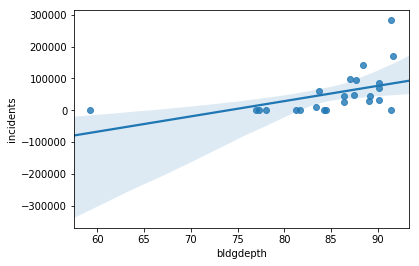

In [18]:
# let's look for the correlations where p < 0.1
sns.regplot(x="bldgdepth", y="incidents", data=merged_values)

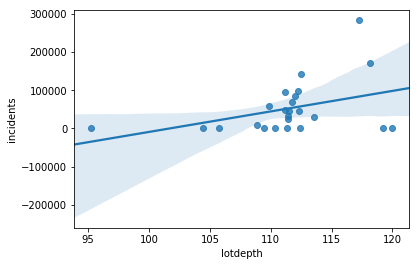

In [19]:
sns.regplot(x="lotdepth", y="incidents", data=merged_values)

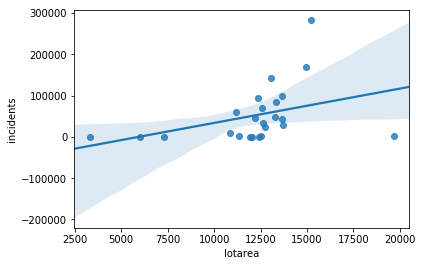

In [20]:
sns.regplot(x="lotarea", y="incidents", data=merged_values)

In [21]:
## we can see, applying pearson correlation to the number of incidents based on house caractheristics, that 
## buildings depth, with pcr 0.49167951852859626  and a P-value of P = 0.014678008603992525,
## lot areas and depth, with pcr around 0.38 and p of 0.05
## are the features that have bigger probabilty of impacting the number of complaints
## But how about the complaint type? can building caractheristics have something to do with them?

In [22]:
## Lets change the complaints to Heat/Hot Water & Heating and "NOT HHW&H"

unique_series = HPD_df["complaint_type"].unique()

for unique in unique_series:
    
    if (unique != 'HEAT/HOT WATER') & (unique !=  'HEATING'):
       HPD_df.replace(unique, 'NOT HHW&H' , inplace = True)
        
HPD_df.replace('HEAT/HOT WATER', 'HHW&H', inplace = True)
HPD_df.replace('HEATING', "HHW&H", inplace = True)

HPD_df.head()


,complaint_type,address
10,NOT HHW&H,1230 TELLER AVENUE
11,NOT HHW&H,1230 TELLER AVENUE
12,NOT HHW&H,1230 TELLER AVENUE
13,NOT HHW&H,1230 TELLER AVENUE
14,NOT HHW&H,1230 TELLER AVENUE


In [23]:
merged_df2 = pd.merge(HPD_df, bronx_pluto, how="outer", on="address")
merged_df2 = merged_df2.dropna(how = "any", axis = 0)
merged_df2.reset_index()

#merged_df2 = merged_df2.rename(columns={"bldgarea" : 0, "bldgdepth" : 1, "builtfar" : 2, "commfar" : 3, "facilfar" : 4, "lot" : 5, "lotarea" : 6, "lotdepth" : 8,
           #                            "numbldgs" : 9, "numfloors" : 10, "resarea" : 11, "residfar" : 12, "retailarea" : 13, "yearbuilt" : 14})

print(merged_df2.dtypes)

complaint_type     object
address            object
bldgarea          float64
bldgdepth         float64
builtfar          float64
commfar           float64
facilfar          float64
lot               float64
lotarea           float64
lotdepth          float64
numbldgs          float64
numfloors         float64
resarea           float64
residfar          float64
retailarea        float64
yearbuilt         float64
dtype: object


In [25]:
x_list = ["bldgdepth", "lotarea", "lotdepth", "numbldgs", "numfloors", "resarea", "residfar", "retailarea", "yearbuilt"]

X = merged_df2[x_list]
y = merged_df2['complaint_type']

## Let's build a RandomForestClassifier and check the features importances to see if we can get to the same conclusion 

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=40, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(forest.score(X_train, y_train), 
                                                                                             forest.score(X_test, y_test)))

[[ 81546  99125]
 [ 40972 276751]]
              precision    recall  f1-score   support

       HHW&H       0.67      0.45      0.54    180671
   NOT HHW&H       0.74      0.87      0.80    317723

   micro avg       0.72      0.72      0.72    498394
   macro avg       0.70      0.66      0.67    498394
weighted avg       0.71      0.72      0.70    498394

0.7189031168111976
R^2 Training Score: 0.73 
R^2 Validation Score: 0.72


Feature ranking:

resarea
feature 5 (0.225782)

lotarea
feature 1 (0.181915)

bldgdepth
feature 0 (0.152090)

lotdepth
feature 2 (0.142020)

yearbuilt
feature 8 (0.135676)

residfar
feature 6 (0.067266)

retailarea
feature 7 (0.044337)

numfloors
feature 4 (0.037295)

numbldgs
feature 3 (0.013619)



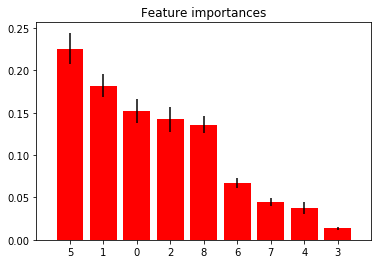

In [30]:
# quite decent, let's take a look at the features importances

import numpy as np

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:\n")

for f in range(X.shape[1]):
    print(x_list[indices[f]])
    print("feature %d (%f)" % (indices[f], importances[indices[f]]))
    print("")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [31]:
## besides resarea, all our 3 most important features at the random forest algorithm are also present at our pearson correlation
# for the number of complaints analysis, so we can assume with some certainty that house caratheristcs can be used to determine the number and type
# of complaint.